In [2]:
%matplotlib inline
from d2l import torch as d2l
import time
import math
import torch
import numpy as np
import pandas as pd


1、线性回归模型：

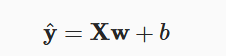（矩阵-向量乘法表示）或者
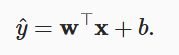（点积形式）

* 线性回归的目标：找到一组权重向量**w**和偏置**b**

2、损失函数：

对于样本i，损失函数如下

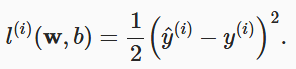

对于在有n个样本的训练集上的损失均值如下

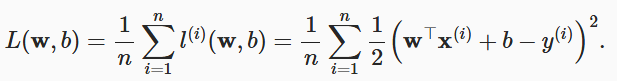

目标是找到一组参数$(w^*,b^*) = argmin_{w,b} L(w,b)$


3、随机梯度下降：

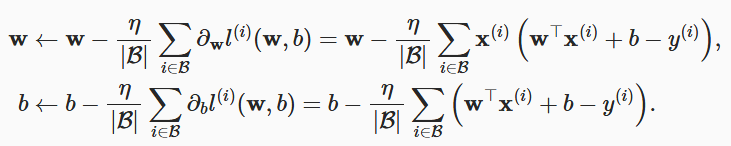
其中$\eta、|\mathcal{B}|$ 分别为学习率(learning rate)和每个小批量中的样本数(batch size)

In [9]:
# 矢量化加速—————同时处理整个小批量得样本
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

n = 10000
a = torch.ones([n])
b = torch.ones([n])
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
print(f'{timer.stop():.5f} sec')

timer.start()
d = a + b
print(f'{timer.stop():.5f} sec')
# 0.20949 sec
# 0.00000 sec       

0.17051 sec
0.00000 sec


### 正态分布与平方损失 
正态分布概率密度函数如下：
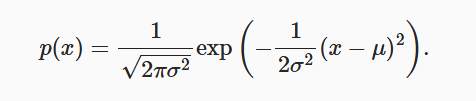

可视化正态分布，可以观察到，改变均值回产生沿x轴得偏移，增加方差将会分散分布，降低其峰值。
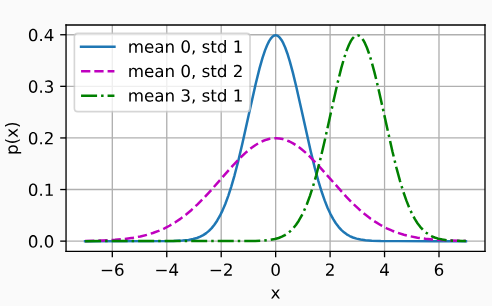

均方误差损失函数（简称均方损失）可以用于线性回归的一个原因是： 我们假设了观测中包含噪声，其中噪声服从正态分布。噪声正态分布如下式：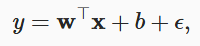，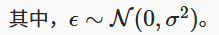

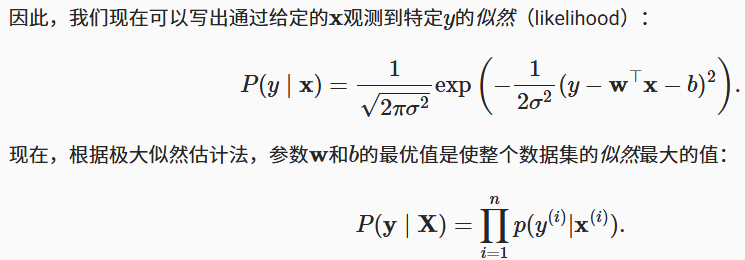

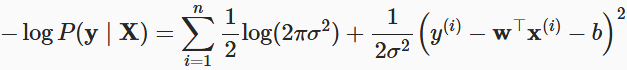

#### T1
T1.1:<br>
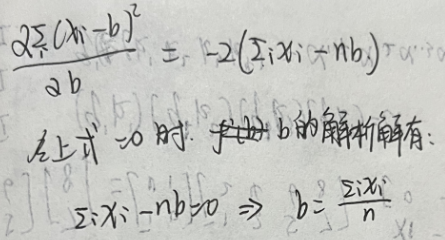<br>
T1.2:<br>
$x_1,...,x_n$ 样本本身就满足正态分布，那么第一问中的最小值就是$\sum_{i=1}^n(x_i-\bar{x})^2$的方差

#### T2(忽略偏置b)
T2.1:<br>
$L(w) = \frac{1}{2m} \sum_{i=1}^n(\hat{y_i} - y_i)^2 =\frac{1}{2m}\parallel\mathcal{X}w - y\parallel ^2_2$<br>
T2.2:<br>
$\bigtriangledown_w\mathcal{L}(w) = \frac{1}{n}\sum_{i=1}^n(\hat{y_i} - y_i)x_i$<br>
T2.3:<br>
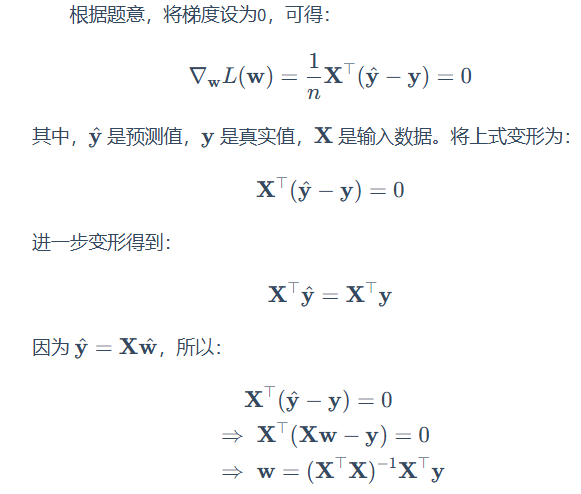<br>
T2.4:<br>
* 当数据集较少时，题三的解析解可能比随机梯度下降更好
* 但是在用于数据集较大上，解析解计算可能非常耗时且存在多个局部最优解
* 另外，当矩阵$\mathbf X^\top \mathbf X$不可逆时，解析解不存在。
